# Valores de Imóveis em São Paulo

## Inicialização do dataframe

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/pedrogrigorio/Imersao-Dados-Alura/main/Materiais/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [89]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
dados_vendas

C:\Users\pedro\AppData\Local\Temp\ipykernel_14852\2870325524.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
C:\Users\pedro\AppData\Local\Temp\ipykernel_14852\2870325524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None


## Verificando desafio 03 da aula anterior

### Encontrando a média

A forma que eu fiz, eu simplesmente dividi todos dados do atributo de valor, pelos dados respectivos para metragem, gerando uma nova coluna de valor por m² e, por fim, foi calculada a média para cada bairro em cima disso. Nesse sentido, outra forma de ver proposta na aula foi somar todos os dados e, apartir dessa soma, calcular o valor do m² pela divisão das colunas.

In [90]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
Bairro,,,,,
Aclimação,19447,258,240,230,1.392928e+08
Alto da Boa Vista,3351,33,41,37,1.913000e+07
Alto da Lapa,23940,252,308,320,1.666535e+08
Alto da Mooca,5401,66,52,73,2.368340e+07
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09
...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06
Água Branca,2083,37,39,27,1.471800e+07
Água Fria,1985,34,41,30,1.112500e+07


In [91]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio"] / dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2_bairro
Bairro,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,7162.688384
Alto da Boa Vista,3351,33,41,37,1.913000e+07,5708.743659
Alto da Lapa,23940,252,308,320,1.666535e+08,6961.299081
Alto da Mooca,5401,66,52,73,2.368340e+07,4385.002777
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,11126.342330
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,4283.837057
Água Branca,2083,37,39,27,1.471800e+07,7065.770523
Água Fria,1985,34,41,30,1.112500e+07,5604.534005


Criar uma outra coluna no dataframe com o método anterior, para poder comparar as formas de se calcular a média do m².

In [92]:
dados_bairro2 = dados_vendas
dados_bairro2["Valor_m2"] = dados_vendas["Valor_anuncio"] / dados_vendas["Metragem"]
dados_bairro2 = dados_bairro2.groupby("Bairro").mean()
dados_bairro["Valor_m2"] = dados_bairro2["Valor_m2"]

C:\Users\pedro\AppData\Local\Temp\ipykernel_14852\2278832865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_bairro2["Valor_m2"] = dados_vendas["Valor_anuncio"] / dados_vendas["Metragem"]


In [93]:
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2_bairro,Valor_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,7162.688384,7656.169465
Alto da Boa Vista,3351,33,41,37,1.913000e+07,5708.743659,5849.569011
Alto da Lapa,23940,252,308,320,1.666535e+08,6961.299081,7606.728080
Alto da Mooca,5401,66,52,73,2.368340e+07,4385.002777,5691.740133
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,11126.342330,11269.979971
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,4283.837057,4467.127995
Água Branca,2083,37,39,27,1.471800e+07,7065.770523,7269.113912
Água Fria,1985,34,41,30,1.112500e+07,5604.534005,5841.104428


In [94]:
dados_bairro.loc["Vila Mariana"]

Metragem           3.907900e+04
Quartos            5.730000e+02
Banheiros          5.470000e+02
Vagas              4.990000e+02
Valor_anuncio      2.993260e+08
Valor_m2_bairro    7.659510e+03
Valor_m2           7.913155e+03
Name: Vila Mariana, dtype: float64

In [95]:
dados_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

### Plotando gráficos para o novo método da média.

Verificando os 10 bairros com mais imóveis.

In [96]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

Nesse momento, nosso dataframe possui bairros como index, mas queremos usar ele como coluna. Nesse sentido, podemos usar o método `df.reset_index()` para transformar o index em coluna e criar um index com números.

In [97]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2_bairro,Valor_m2
0,Aclimação,19447,258,240,230,1.392928e+08,7162.688384,7656.169465
1,Alto da Boa Vista,3351,33,41,37,1.913000e+07,5708.743659,5849.569011
2,Alto da Lapa,23940,252,308,320,1.666535e+08,6961.299081,7606.728080
3,Alto da Mooca,5401,66,52,73,2.368340e+07,4385.002777,5691.740133
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,11126.342330,11269.979971
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3.260000e+06,4283.837057,4467.127995
693,Água Branca,2083,37,39,27,1.471800e+07,7065.770523,7269.113912
694,Água Fria,1985,34,41,30,1.112500e+07,5604.534005,5841.104428
695,Água Funda,278,6,5,4,1.090000e+06,3920.863309,3876.862745


Aqui fazemos uma query para pegar apenas os bairros que estão na consulta que fizemos dos top 10 bairros. <br>
_Obs: na query, top_bairros é entendido como string, então devemos passar o @ para dizer que é uma informação encontrada anteriormente_

In [98]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2_bairro,Valor_m2
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,11126.342330,11269.979971
19,Brooklin Paulista,70002,778,862,832,4.757968e+08,6796.902788,7264.919084
57,Cidade Jardim,132220,789,1008,1172,1.164211e+09,8805.104372,8563.837613
155,Jardim Europa,118898,795,993,1056,2.414173e+09,20304.571145,19962.687870
168,Jardim Guedala,972212,1443,2027,2161,1.801166e+09,1852.646940,8027.996572
187,Jardim Leonor,97141,697,941,902,6.463264e+08,6653.486880,6563.875305
227,Jardim Paulista,130283,1028,1231,1171,2.136081e+09,16395.700130,16087.451845
338,Pacaembu,100285,774,889,1028,8.679565e+08,8654.898539,8768.361378
396,Planalto Paulista,59250,636,768,713,3.749070e+08,6327.544304,6447.722579
564,Vila Madalena,66250,739,786,712,5.832530e+08,8803.819321,9054.395958


Plotando o gráfico de barras.

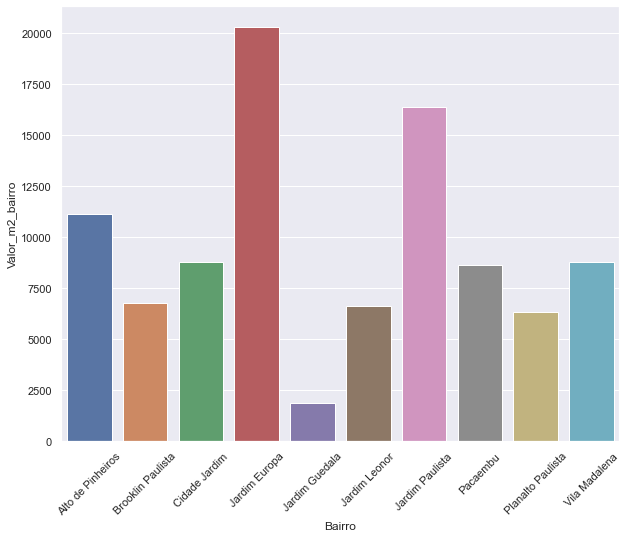

In [108]:
sns.set()
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

Plotando o gráfico de caixa para valores de anúncios e metragem.

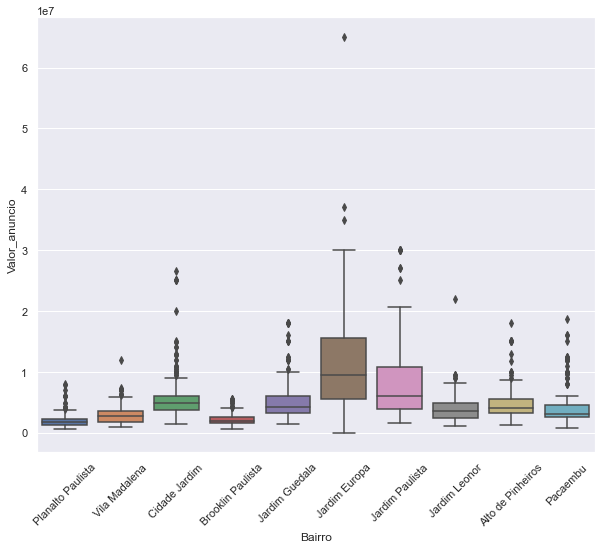

In [117]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio")
ax.tick_params(axis='x', rotation=45)

No gráfico abaixo, visualizamos a metragem por bairro. Entretanto, a escala está ruim para enxergar os valores, por conta do outlier em Jardim Guedala.

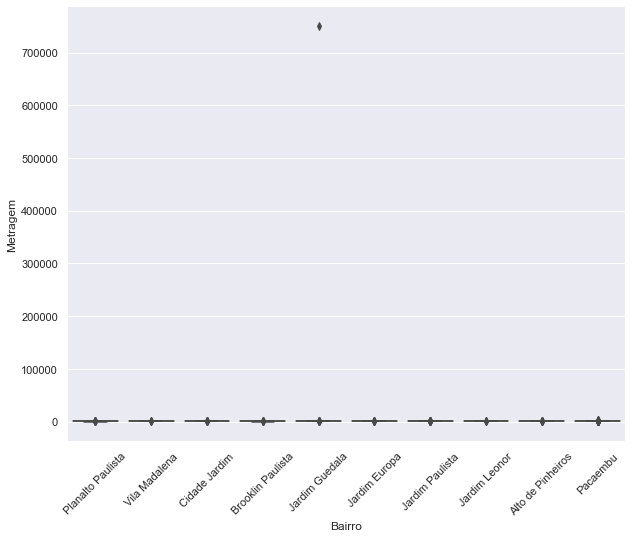

In [115]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)

Removendo os bairros com metragem acima de 30000.

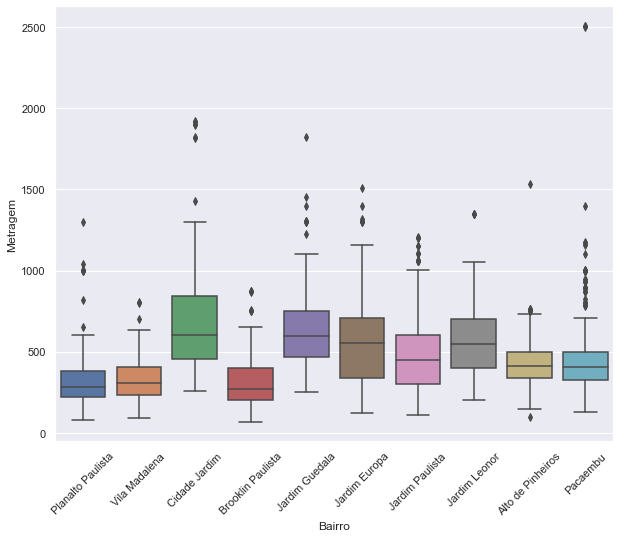

In [116]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)

## Desafios

* Tentar vincular dados do IBGE com os dados de imóveis. <br>
* Tratar os outliers e comparar com os resultados. <br>
* Agrupar por mais de uma categoria e realizar as análises. <br>
* Organize o colab para deixar com cara de projeto.